In [1]:
import pandas as pd
df=pd.read_csv("Bangladesh_crime.csv")

In [7]:
df

,Year,Unit Name,Dacoity,Robbery,Murder,Speedy Trial,Riot,Woman & Child Repression,Kidnapping,Police Assault,Burglary,Theft,Other Cases,Arms Act,Explosive,Narcotics,Smuggling,Total,Total Cases
0,2010,DMP,47,220,245,363,3,1370,139,155,555,1915,7228,518,82,10535,144,11279,23519
1,2010,CMP,16,108,94,31,7,455,37,31,123,314,1831,51,0,866,99,1016,4063
2,2010,KMP,3,9,29,25,0,153,11,4,65,91,551,19,2,792,13,826,1767
3,2010,RMP,4,20,21,9,15,157,9,12,53,106,578,3,4,332,248,587,1571
4,2010,BMP,8,12,19,21,0,112,6,8,24,83,557,17,0,155,117,289,1139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2019,Rangpur Range,1,2,33,0,0,116,0,0,8,38,625,4,0,551,94,649,1472
176,2019,Railway Range,0,1,2,0,0,0,0,0,0,5,9,0,0,55,12,67,84
177,2019,GMP,2,3,3,1,0,22,1,2,2,8,65,3,0,130,2,135,244
178,2019,RPMP,0,0,1,0,0,12,1,0,0,6,33,0,0,68,0,68,121


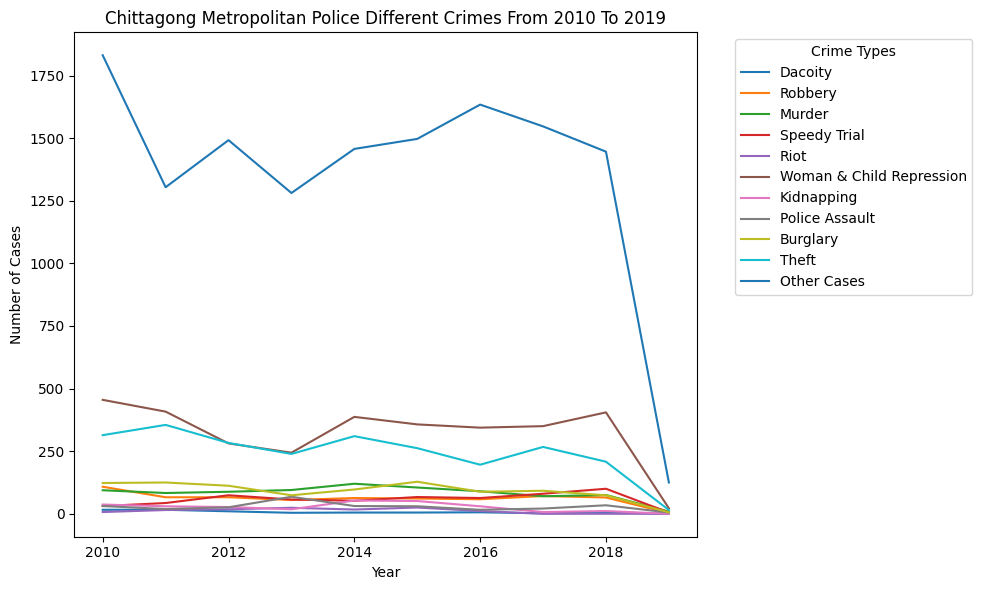

In [3]:
import matplotlib.pyplot as plt

# Filter data for 'CMP' (Chittagong Metropolitan Police)
df_cmp = df[df['Unit Name'] == 'CMP']

# Set the columns to plot
crime_columns = ['Dacoity', 'Robbery', 'Murder', 'Speedy Trial', 'Riot', 
                 'Woman & Child Repression', 'Kidnapping', 'Police Assault', 
                 'Burglary', 'Theft', 'Other Cases']

# Plot the data
plt.figure(figsize=(10, 6))

# Plot each crime category
for crime in crime_columns:
    plt.plot(df_cmp['Year'], df_cmp[crime], label=crime)

# Adding title and labels
plt.title("Chittagong Metropolitan Police Different Crimes From 2010 To 2019")
plt.xlabel('Year')
plt.ylabel('Number of Cases')

# Adding a legend with a title
plt.legend(title='Crime Types', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


In [14]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [15]:
# Filter data for specific units: CMP, DMP, KMP, RMP, BMP
filtered_units = ['CMP', 'DMP', 'KMP', 'RMP', 'BMP','SMP','Dhaka Range','Chittagong Range','Sylhet Range','Khulna Range','Barisal Range','Rajshahi Range']
df_filtered = df[df['Unit Name'].isin(filtered_units)]

In [22]:
df_filtered.head(12)

,Year,Unit Name,Dacoity,Robbery,Murder,Speedy Trial,Riot,Woman & Child Repression,Kidnapping,Police Assault,Burglary,Theft,Other Cases,Arms Act,Explosive,Narcotics,Smuggling,Total,Total Cases
0,2010,DMP,47,220,245,363,3,1370,139,155,555,1915,7228,518,82,10535,144,11279,23519
1,2010,CMP,16,108,94,31,7,455,37,31,123,314,1831,51,0,866,99,1016,4063
2,2010,KMP,3,9,29,25,0,153,11,4,65,91,551,19,2,792,13,826,1767
3,2010,RMP,4,20,21,9,15,157,9,12,53,106,578,3,4,332,248,587,1571
4,2010,BMP,8,12,19,21,0,112,6,8,24,83,557,17,0,155,117,289,1139
5,2010,SMP,12,33,33,34,1,104,14,12,33,154,866,14,0,154,20,188,1484
6,2010,Dhaka Range,162,199,1153,362,7,4272,171,71,643,1477,19966,309,30,4459,993,5791,34274
8,2010,Chittagong Range,153,122,639,245,32,2915,111,87,429,998,12985,235,20,4730,612,5597,24313
9,2010,Sylhet Range,85,43,245,75,17,848,41,19,186,524,5266,30,4,905,172,1111,8460
10,2010,Khulna Range,74,125,513,110,15,2275,156,25,332,947,9954,211,96,2292,1238,3837,18363


In [24]:
# Select relevant columns (Crime features and Unit Name as target)
features = ['Dacoity', 'Robbery', 'Murder', 'Speedy Trial', 'Riot', 
            'Woman & Child Repression', 'Kidnapping', 'Police Assault', 
            'Burglary', 'Theft', 'Other Cases']
features

['Dacoity',
 'Robbery',
 'Murder',
 'Speedy Trial',
 'Riot',
 'Woman & Child Repression',
 'Kidnapping',
 'Police Assault',
 'Burglary',
 'Theft',
 'Other Cases']

In [26]:
# Target variable is 'Unit Name'
target = 'Unit Name'
target

'Unit Name'

In [30]:
# Define features and target
X = df_filtered [features]
y = df_filtered [target]


(120,)

In [31]:
# Convert the target (Unit Name) to numerical labels using LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [32]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [35]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

In [36]:
# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [37]:
# Make predictions
y_pred = clf.predict(X_test)

In [39]:
y_test

array([11,  9,  0,  3,  6,  0,  2,  1,  0,  9,  5,  6,  9,  4, 10,  3,  2,
        4,  0, 11, 10,  7,  3,  1])

In [38]:
y_pred

array([11,  3,  6,  3,  0,  0,  2,  1, 10, 11,  5,  6,  7,  4,  8,  3, 11,
        4,  0, 11, 10,  3,  3,  1])

In [40]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 62.50%


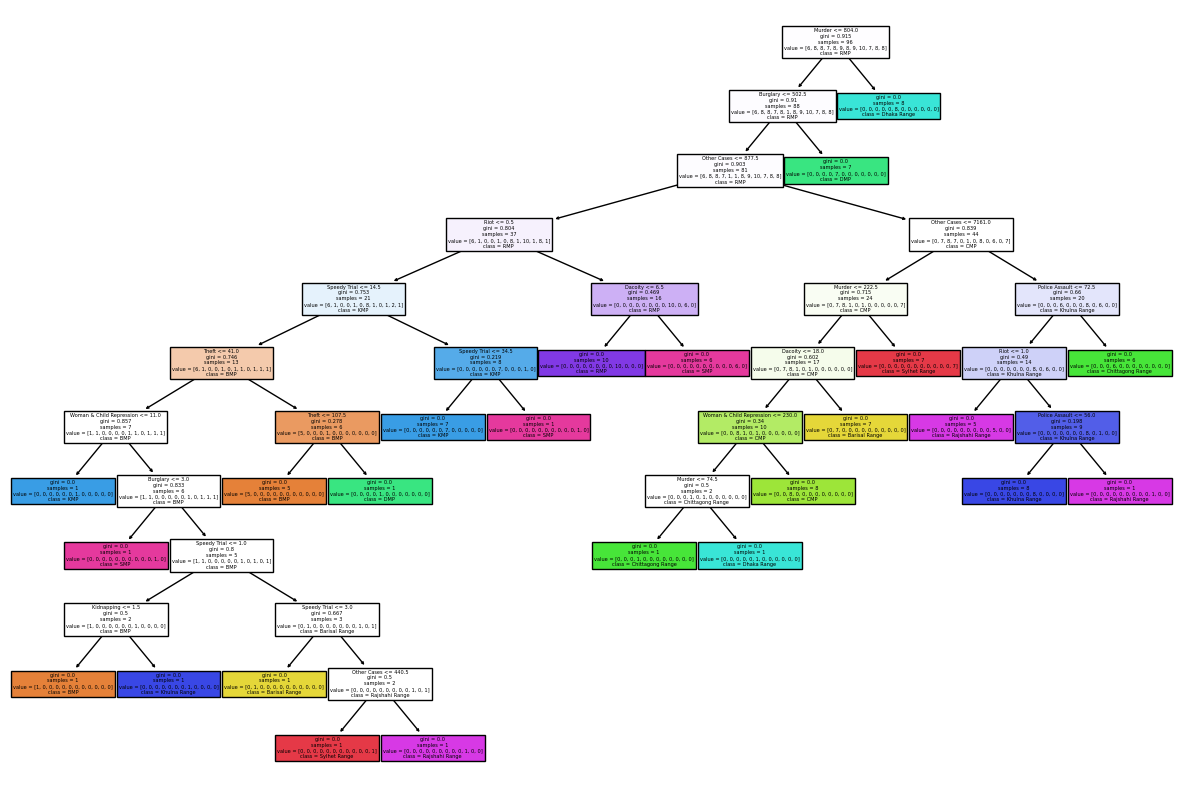

In [41]:
# Optional: Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=features, class_names=le.classes_, filled=True)
plt.show()

## Random forest 

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data = pd.read_csv("Bangladesh_crime.csv")

# Filter data for specific units: CMP, DMP, KMP, RMP, BMP
filtered_units = ['CMP', 'DMP', 'KMP', 'RMP', 'BMP','SMP','Railway Range']
df_filtered = df[df['Unit Name'].isin(filtered_units)]

# Example of basic data preprocessing (you will need to adapt based on the dataset's structure)
# Assuming there's a 'crime_type' column we want to predict
# Fill missing values and convert categorical features if needed

# Feature Selection: Selecting relevant features
X = df_filtered.drop(columns=['Unit Name'])  # Assuming 'crime_type' is the target column
y = df_filtered['Unit Name']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8571428571428571
               precision    recall  f1-score   support

          BMP       1.00      0.33      0.50         3
          CMP       1.00      1.00      1.00         1
          DMP       1.00      1.00      1.00         2
          KMP       1.00      1.00      1.00         1
          RMP       1.00      1.00      1.00         3
Railway Range       0.00      0.00      0.00         0
          SMP       0.80      1.00      0.89         4

     accuracy                           0.86        14
    macro avg       0.83      0.76      0.77        14
 weighted avg       0.94      0.86      0.86        14



D:\plant_pathology\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\plant_pathology\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\plant_pathology\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
